## Load Packages

In [15]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,  TransformedTargetRegressor

from env import *
from plotting.unique import *
from processing.data import Data

pd.pandas.set_option('display.max_columns', None)

## Import Data

In [16]:

train = Data.from_csv(filepath=DIR_DATA_TRAIN, index_col=COL_ID)
test  = Data.from_csv(filepath=DIR_DATA_TEST, index_col=COL_ID)
print(train)
repr(train)

A dataframe with 1460 rows and 80 columns


'Data(df)'

In [17]:
# Create more human-readable columns
for regex, repl in REGEX_REPL_COLUMN:
    train.columns = train.columns.map(lambda x: re.sub(string=x, pattern=regex, repl=repl))

train.columns = train.columns.map(str.lower)

print(f'Columns of training data: {train.columns.tolist()}')

Columns of training data: ['ms_sub_class', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'conditionition_1', 'conditionition_2', 'building_type', 'house_style', 'overall_quality', 'overall_condition', 'year_built', 'year_remod_add', 'roof_style', 'roof_material', 'exterior1st', 'exterior2nd', 'masonry_veneer_type', 'masonry_veneer_area', 'external_quality', 'external_condition', 'foundation', 'basement_quality', 'basement_condition', 'basement_exposure', 'basement_finished_type_1', 'basement_finished_sq_ft_1', 'basement_finished_type_2', 'basement_finished_sq_ft_2', 'basement_unf_sq_ft', 'total_basement_sq_ft', 'heating', 'heating_quality_condition', 'central_air', 'electrical', '1st_floor_sq_ft', '2nd_floor_sq_ft', 'low_quality_finished_sq_ft', 'ground_liv_area', 'basement_full_bath', 'basement_half_bath', 'full_bath', 'half_bath', 'bedroom_above_ground', 'kitchen_above_ground', 'kitche

## Variable Types

In [22]:
train.print_column_types()

There are 43 categorical fields:
['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'conditionition_1', 'conditionition_2', 'building_type', 'house_style', 'roof_style', 'roof_material', 'exterior1st', 'exterior2nd', 'masonry_veneer_type', 'external_quality', 'external_condition', 'foundation', 'basement_quality', 'basement_condition', 'basement_exposure', 'basement_finished_type_1', 'basement_finished_type_2', 'heating', 'heating_quality_condition', 'central_air', 'electrical', 'kitchen_quality', 'functional', 'fireplace_qu', 'garage_type', 'garage_finishedish', 'garage_quality', 'garage_condition', 'paved_drive', 'pool_quality_condition', 'fence', 'misc_feature', 'sale_type', 'sale_conditionition']
There are 37 numerical fields:
['ms_sub_class', 'lot_frontage', 'lot_area', 'overall_quality', 'overall_condition', 'year_built', 'year_remod_add', 'masonry_veneer_area', 'basement_finished_sq_ft_1', 'basement_finished_sq_

In [18]:
train.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ms_sub_class                1460 non-null   int64  
 1   ms_zoning                   1460 non-null   object 
 2   lot_frontage                1201 non-null   float64
 3   lot_area                    1460 non-null   int64  
 4   street                      1460 non-null   object 
 5   alley                       91 non-null     object 
 6   lot_shape                   1460 non-null   object 
 7   land_contour                1460 non-null   object 
 8   utilities                   1460 non-null   object 
 9   lot_config                  1460 non-null   object 
 10  land_slope                  1460 non-null   object 
 11  neighborhood                1460 non-null   object 
 12  conditionition_1            1460 non-null   object 
 13  conditionition_2            1460 

## Unique Values

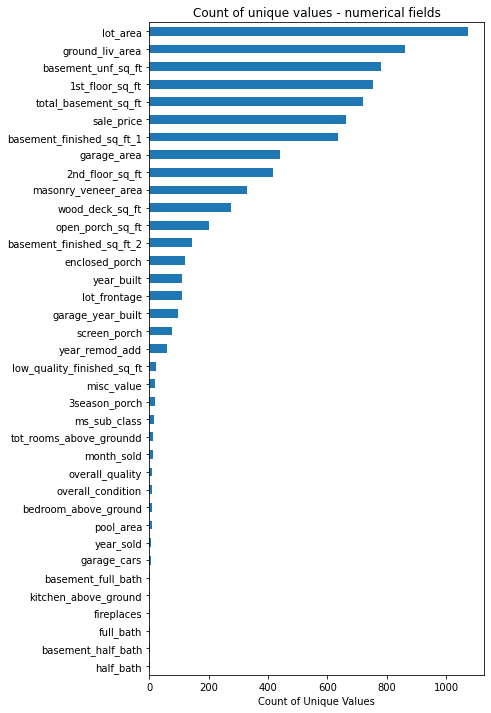

In [19]:
plot_count_unique(train.df, 
                  dtype_include=['float64', 'int64'],
                  title='Count of unique values - numerical fields')

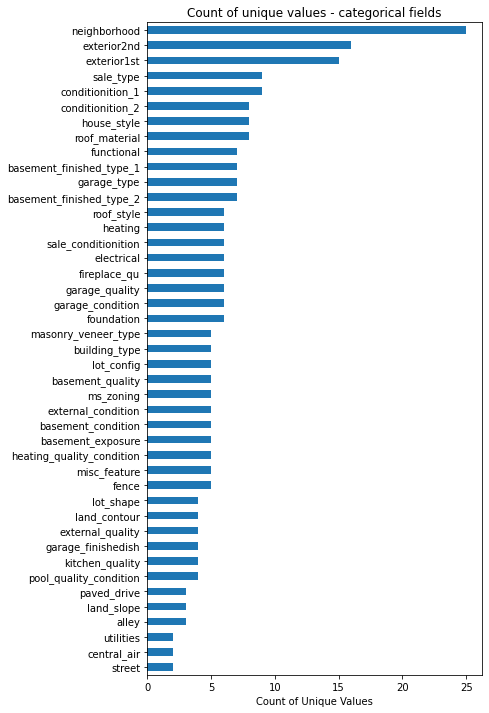

In [20]:
plot_count_unique(train.df, 
                  dtype_include=['O'],
                  title='Count of unique values - categorical fields')

In [21]:
train.remove_constant_columns()

# ms_sub_class is a categorical feature
train.change_column_types({'ms_sub_class': 'object'})

Found 0 constant column(s). Removing columns:
[]
Changed ms_sub_class to `object` type


## Missing Values

In [23]:
missing_bool = train.df.apply(lambda x: x.isnull().sum() > 0)

print(f'Fields with missing values:')
print("\n".join(train.df.columns[missing_bool].tolist()))

Fields with missing values:
lot_frontage
alley
masonry_veneer_type
masonry_veneer_area
basement_quality
basement_condition
basement_exposure
basement_finished_type_1
basement_finished_type_2
electrical
fireplace_qu
garage_type
garage_year_built
garage_finishedish
garage_quality
garage_condition
pool_quality_condition
fence
misc_feature


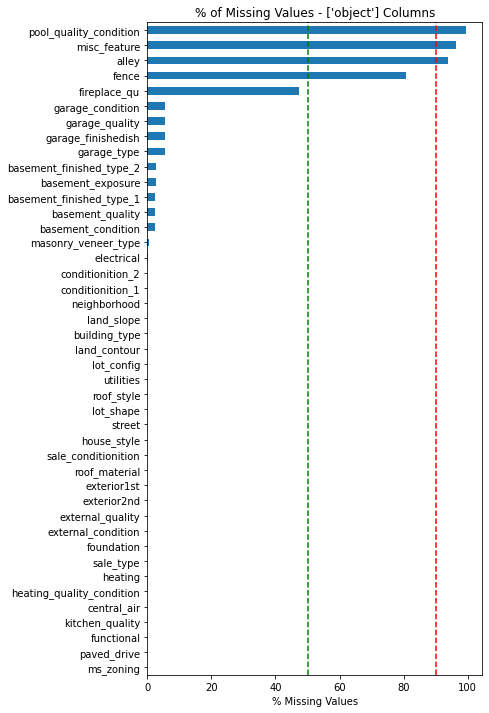

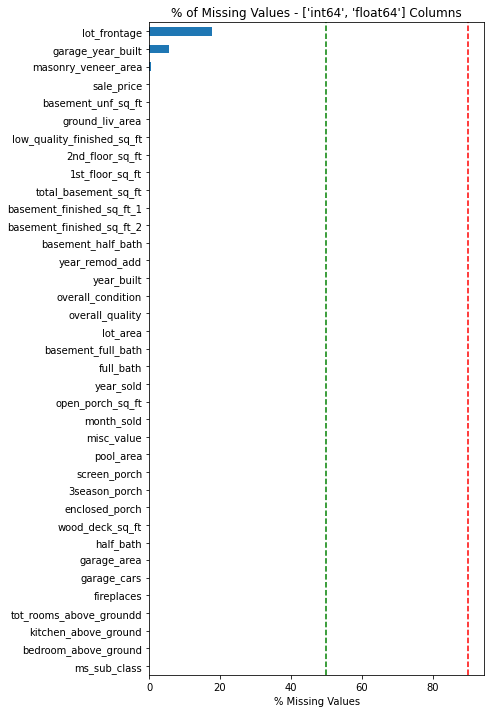

In [44]:
# Plot percentage of missing data
for dtypes in [['object',], ['int64', 'float64']]:

    plot_perc_missing(
        train.df, 
        title=f'% of Missing Values - {dtypes} Columns',
        dtype_include=dtypes,
        )